In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('prices.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
data=df.drop(['symbol','open','close','low','high'],axis=1)

In [ ]:
data.head()

In [ ]:
data.columns=['ds','y']

In [ ]:
data.head()

In [ ]:
data['ds']=pd.DatetimeIndex(data['ds'])

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
sns.lineplot(data=data,x='ds',y='y')

In [ ]:
from prophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
model.fit(data)

In [ ]:
forcast=model.make_future_dataframe(periods=1600,freq='D')

In [ ]:
forcast.head()

In [ ]:
forcasting=model.predict(forcast)

In [ ]:
forcasting.head()

In [ ]:

from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()


In [ ]:
model.plot_components(forcasting)

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forcasting)
a = add_changepoints_to_plot(fig.gca(),model, forcast)

In [2]:
df=pd.read_csv('prices-split-adjusted.csv')

In [8]:

df['date']=pd.DatetimeIndex(df['date'])
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


<Axes: xlabel='date', ylabel='high'>

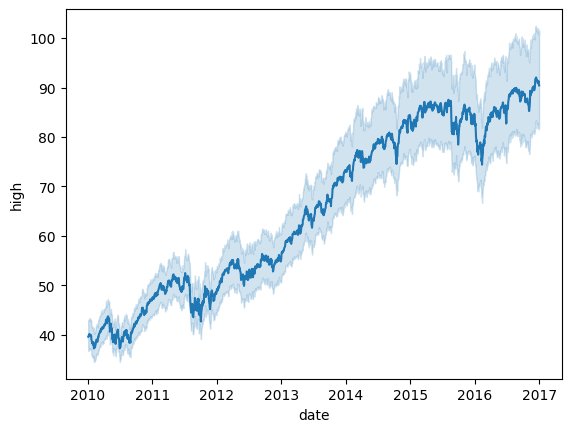

In [9]:
sns.lineplot(data=df,x='date',y='high')

In [12]:
data=df[['date','high']]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   high    851264 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 MB


In [14]:
from prophet import Prophet

In [17]:
model=Prophet(interval_width=0.9)
data.columns=['ds','y']

In [18]:
model.fit(data)

06:15:52 - cmdstanpy - INFO - Chain [1] start processing
06:22:22 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_dates=model.make_future_dataframe(periods=1600,freq='D')

In [20]:
future_dates.head()

,ds
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08


In [21]:
forecast=model.predict(future_dates)

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,38.006720,-81.595504,162.175116,38.006720,38.006720,2.833907,2.833907,2.833907,3.845829,3.845829,3.845829,-1.011923,-1.011923,-1.011923,0.0,0.0,0.0,40.840627
1,2010-01-05,37.996179,-76.403792,169.533535,37.996179,37.996179,2.807934,2.807934,2.807934,3.885923,3.885923,3.885923,-1.077988,-1.077988,-1.077988,0.0,0.0,0.0,40.804113
2,2010-01-06,37.985638,-71.606850,163.917111,37.985638,37.985638,2.758859,2.758859,2.758859,3.904323,3.904323,3.904323,-1.145465,-1.145465,-1.145465,0.0,0.0,0.0,40.744497
3,2010-01-07,37.975097,-75.921835,163.282807,37.975097,37.975097,2.718192,2.718192,2.718192,3.932544,3.932544,3.932544,-1.214352,-1.214352,-1.214352,0.0,0.0,0.0,40.693289
4,2010-01-08,37.964556,-74.789292,161.676549,37.964556,37.964556,2.624668,2.624668,2.624668,3.909279,3.909279,3.909279,-1.284611,-1.284611,-1.284611,0.0,0.0,0.0,40.589224


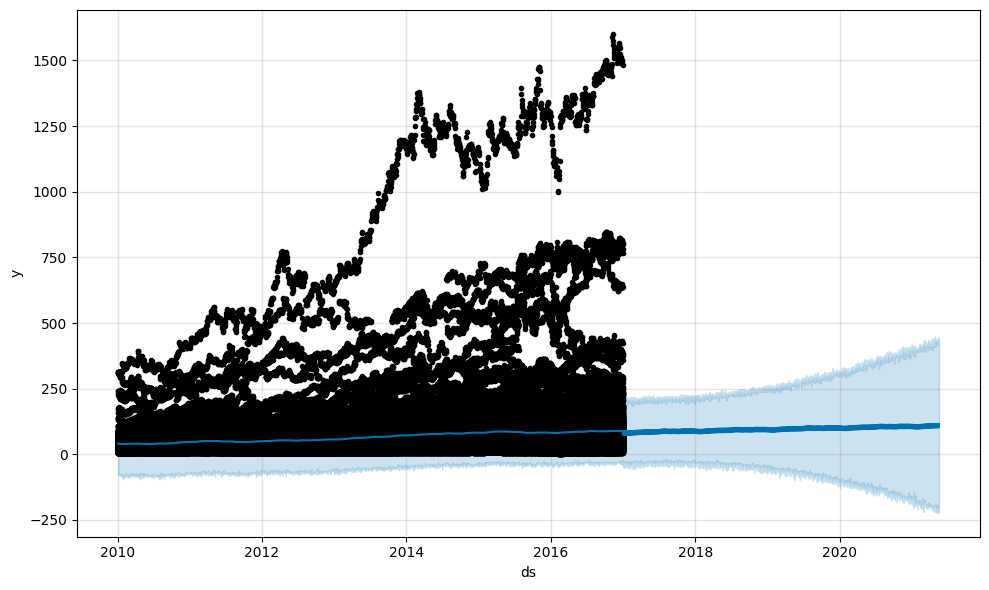

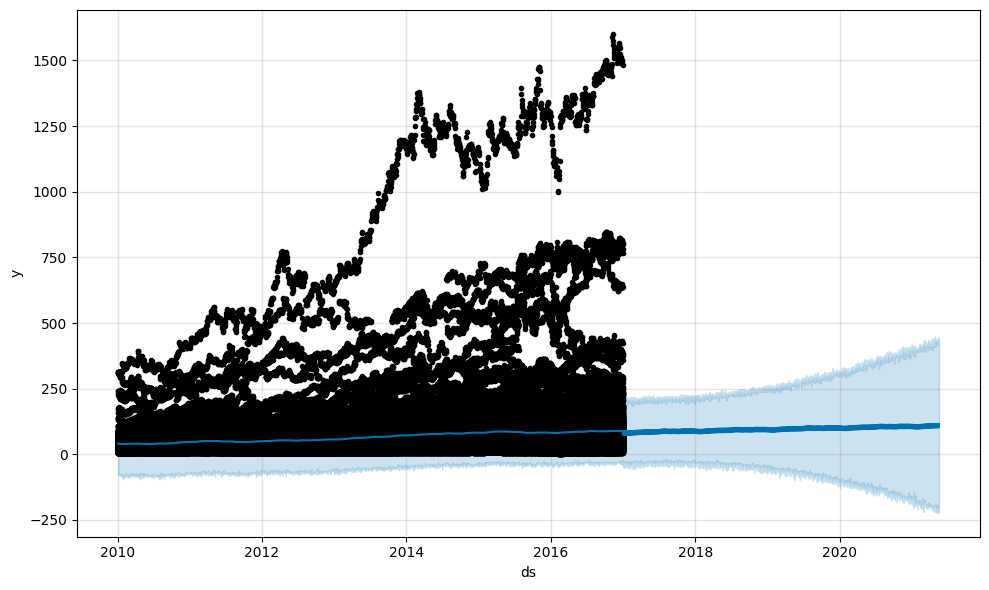

In [23]:
model.plot(forecast,uncertainty=True)